# Installation and Import

In [1]:
!pip install matplotlib

Looking in indexes: https://pkgs.dev.azure.com/Lyse-Produksjon/_packaging/Lyse-Produksjon/pypi/simple/


In [2]:
import matplotlib.pyplot as plt
import math

# Plotting functions

In [3]:
def plot_multi_line(x_axis, y_axis, target_points, plot_settings):
    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(14, 10))

    cmap = plt.get_cmap('inferno')
    
    global_min_x, global_max_x, global_min_y, global_max_y = min(x_axis), max(x_axis), min(y_axis[list(y_axis.keys())[0]]), max(y_axis[list(y_axis.keys())[0]])
    color_index = 0
    
    for label, data in y_axis.items():
        # Plot
        ax.plot(x_axis, data, label=label, color=cmap(color_index*10), linestyle='-')
        # Put label on plot line
        if "activate_legend" in plot_settings and plot_settings["activate_legend"]:
            # Set a legend
            ax.legend()  
        else:
             ax.text(max(x_axis), max(data), label, fontsize=8, color=cmap(color_index*10), ha='center', va='bottom')
        min_x, max_x, min_y, max_y = int(min(x_axis)), int(max(x_axis)), int(min(data)), int(max(data))
        global_min_x = min_x if min_x < global_min_x else global_min_x
        global_max_x = max_x if max_x > global_max_x else global_max_x
        global_min_y = min_y if min_y < global_min_y else global_min_y
        global_max_y = max_y if max_y > global_max_y else global_max_y
        
        color_index += 1
        
    # Mark target points
    for target_point in target_points:
        x_point, y_point = target_point["x"], math.ceil(target_point["y"])
        ax.vlines(x_point, ymin=global_min_y, ymax=y_point, color='green', linestyle='--', label='Vertical Line')
        ax.hlines(y_point, xmin=global_min_x, xmax=x_point, color='green', linestyle='--', label='Horizontal Line')
        ax.scatter(x_point, y_point, color='black', marker='o', label=f'Target Point ({x_point}, {y_point})')
        ax.text(x_point, y_point+2, f'Target Point ({x_point}, {y_point})', fontsize=10, color='black', ha='left', va='bottom')

    # Add labels, title, legend box and set axis intervall
    ax.set_xlabel(plot_settings["xlabel"])
    ax.set_ylabel(plot_settings["ylabel"])
    ax.set_title(plot_settings["title"])
    ax.set_xticks(range(int(global_min_x), int(global_max_x)+plot_settings["xtick_intervall"], plot_settings["xtick_intervall"]))
    ax.set_yticks(range(int(global_min_y), int(global_max_y)+plot_settings["ytick_intervall"], plot_settings["ytick_intervall"]))
    ax.grid(plot_settings["activate_grid"] if "activate_grid" in plot_settings else False)


    # Display the plot
    plt.show()

# Increase of Stall Speed with Bank Angle

In [4]:
def calc_stall_speed_with_bank_angle(normal_stall_speed, bank_angle):
    # Convert degrees to radians
    angle_radians = math.radians(bank_angle)
    # Calculate load factor
    load_factor = 1/math.cos(angle_radians)
    # Calculate the increase in stall speed
    increase_of_stall_speed = math.sqrt(load_factor)
    # Calculate stall speed with bank angle
    stall_speed_with_bank_angle = normal_stall_speed * increase_of_stall_speed
    
    return stall_speed_with_bank_angle

def calc_stall_speeds_with_bank_angle(normal_stall_speeds, bank_angles):
    stall_speeds_at_angles = {}

    for index in range(0, len(normal_stall_speeds), 1):
        normal_stall_speed = normal_stall_speeds[index]
        
        stall_speed_at_angles = []
        for bank_angle in bank_angles:
            stall_speed_with_bank_angle = calc_stall_speed_with_bank_angle(normal_stall_speed, bank_angle)
            stall_speed_at_angles.append(stall_speed_with_bank_angle)
            
        stall_speeds_at_angles[f'{normal_stall_speed} Knots'] =  stall_speed_at_angles
        
    return stall_speeds_at_angles

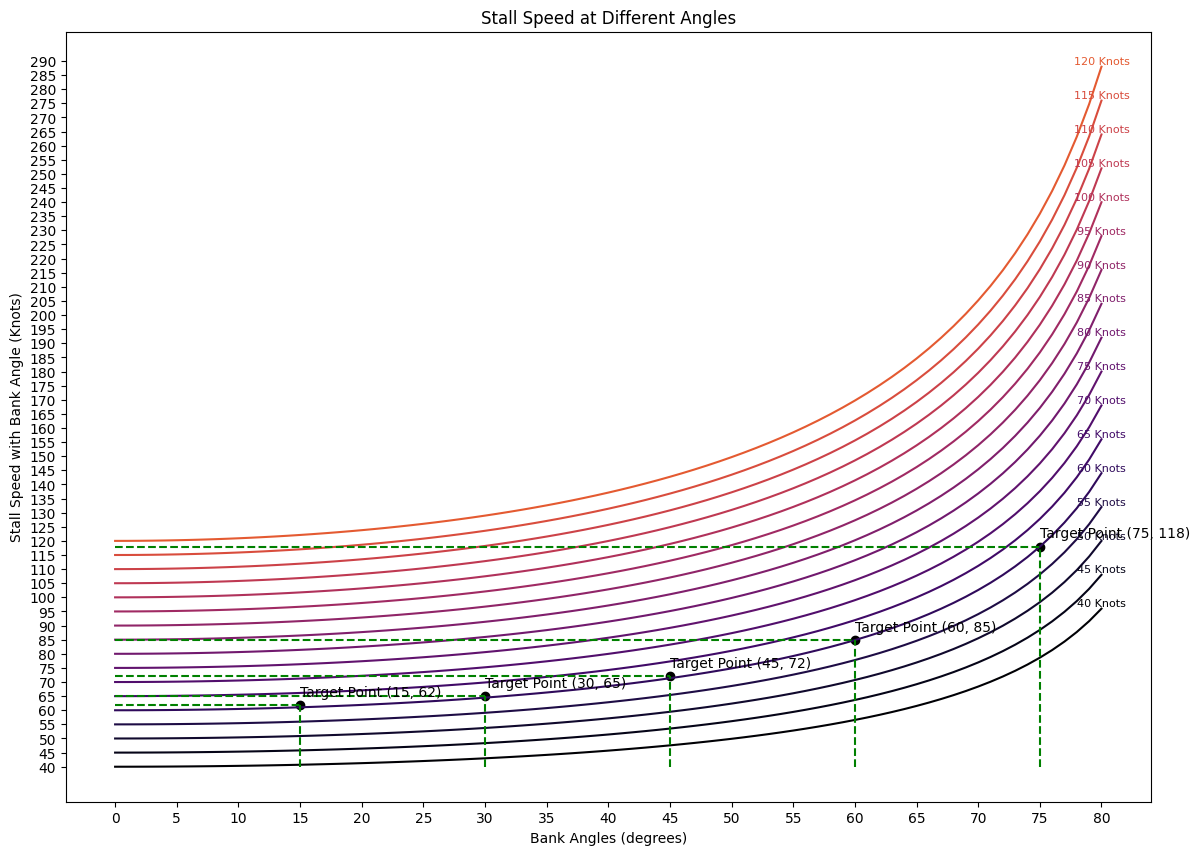

In [5]:
bank_angles = list(range(0, 81, 1))
normal_stall_speeds = list(range(40, 121, 5))

stall_speeds_at_angles = calc_stall_speeds_with_bank_angle(normal_stall_speeds, bank_angles)

normal_stall_speed = 60
target_points = [
    {
        "x": 15, # bank angle
        "y": calc_stall_speed_with_bank_angle(normal_stall_speed, 15)  #stall speed with bank angle 15
    },
    {
        "x": 30, # bank angle
        "y": calc_stall_speed_with_bank_angle(normal_stall_speed, 30)  #stall speed with bank angle 30
    },
    {
        "x": 45, # bank angle
        "y": calc_stall_speed_with_bank_angle(normal_stall_speed, 45)  #stall speed with bank angle 45
    },
    {
        "x": 60, # bank angle
        "y": calc_stall_speed_with_bank_angle(normal_stall_speed, 60)  #stall speed with bank angle 60
    },
    {
        "x": 75, # bank angle
        "y": calc_stall_speed_with_bank_angle(normal_stall_speed, 75)  #stall speed with bank angle 75
    },
]

plot_settings = {
    "xlabel": "Bank Angles (degrees)",
    "ylabel": "Stall Speed with Bank Angle (Knots)",
    "title": "Stall Speed at Different Angles",
    "xtick_intervall": 5,
    "ytick_intervall": 5,
}

plot_multi_line(
    x_axis=bank_angles, 
    y_axis=stall_speeds_at_angles,
    target_points=target_points,
    plot_settings=plot_settings
)


In [6]:
def calc_isa_temprature(height_above_sea_level):
    # Calculate the corresponding temperature at altitude using the lapse rate
    lapse_rate_celsius = -1.944  # Standard lapse rate in degrees Celsius per 1000 feet
    temperature_celsius = 15  # Starting temperature at sea level in degrees Celsius
    temperature_at_altitude = temperature_celsius + (lapse_rate_celsius * (height_above_sea_level / 1000))
    return temperature_at_altitude

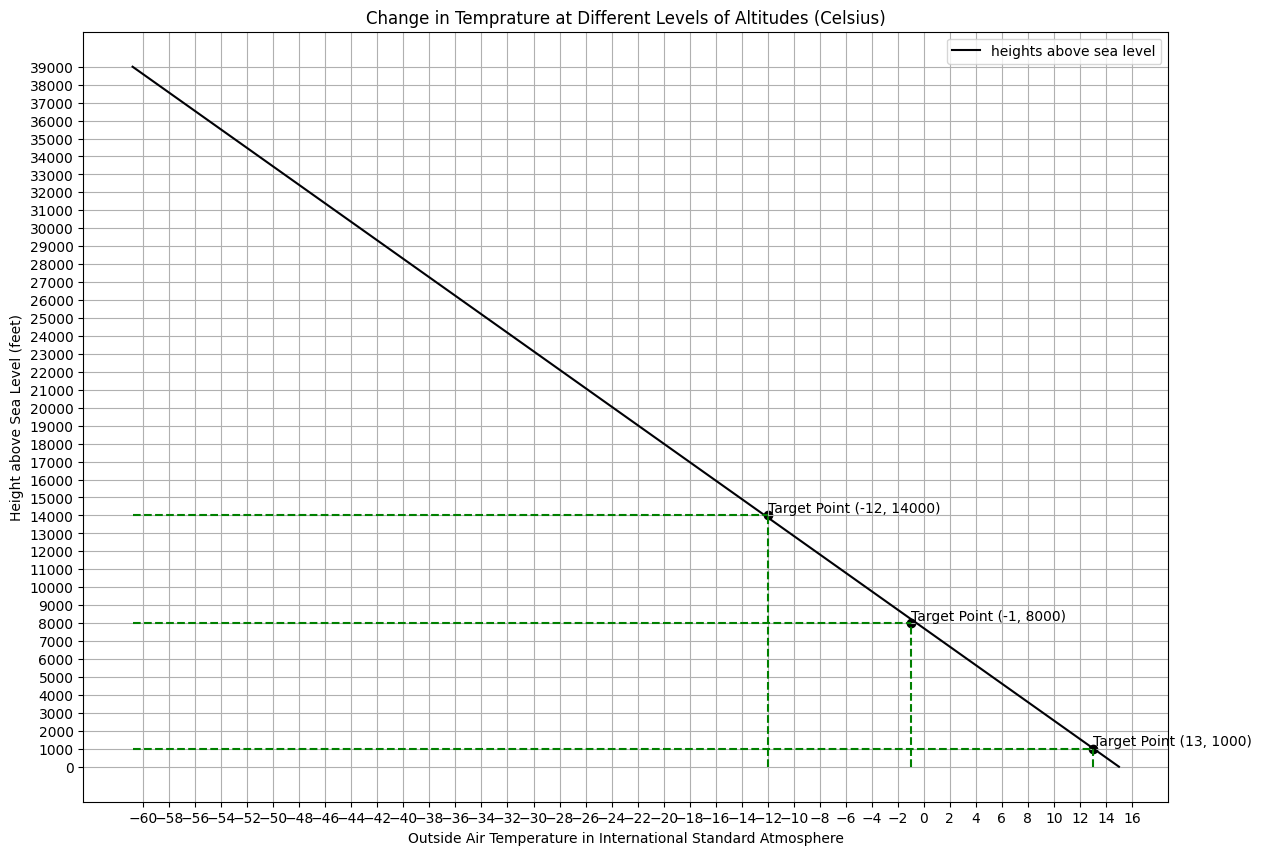

In [7]:
heights_above_sea_level = list(range(0, 40000, 1000))
isa_temprature = [calc_isa_temprature(height) for height in heights_above_sea_level]

target_points = [
    {
        "x": round(calc_isa_temprature(1000)), # ISA temperature
        "y": 1000  # height above sea level
    },
    {
        "x": round(calc_isa_temprature(8000)), # ISA temperature
        "y": 8000  # height above sea level
    },
    {
        "x": round(calc_isa_temprature(14000)), # ISA temperature
        "y": 14000  # height above sea level
    },
]

plot_settings = {
    "xlabel": "Outside Air Temperature in International Standard Atmosphere",
    "ylabel": "Height above Sea Level (feet)",
    "title": "Change in Temprature at Different Levels of Altitudes (Celsius)",
    "xtick_intervall": 2,
    "ytick_intervall": 1000,
    "activate_legend": True,
    "activate_grid": True,
}

plot_multi_line(
    x_axis=isa_temprature, 
    y_axis={"heights above sea level": heights_above_sea_level},
    target_points=target_points,
    plot_settings=plot_settings
)